   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 7.5 MB/s eta 0:00:00


        ┌───┐ ░  ░                 ░ ┌───┐┌───┐          ┌───┐┌───┐      ░  ░ »
   q_0: ┤ H ├─░──░────────■────────░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░──░─»
        ├───┤ ░  ░        │        ░ ├───┤├───┤       │  ├───┤├───┤      ░  ░ »
   q_1: ┤ H ├─░──░────────■────────░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░──░─»
        ├───┤ ░  ░        │        ░ ├───┤├───┤       │  ├───┤├───┤      ░  ░ »
   q_2: ┤ H ├─░──░────────■────────░─┤ H ├┤ X ├─

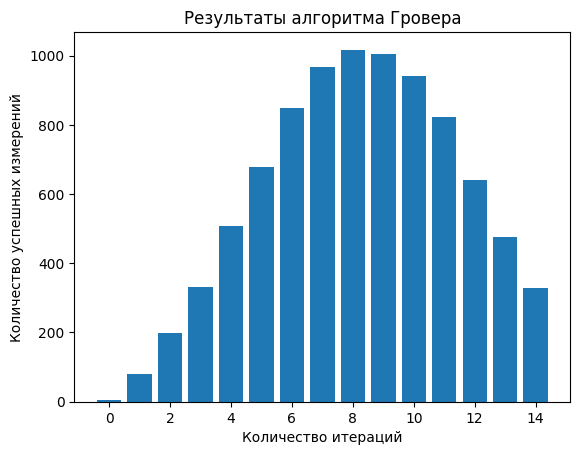

In [1]:
!pip install qiskit qiskit_aer matplotlib

import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit_aer import Aer

state = '1110111'
n = 7

def oracle(circuit):
    for i, bit in enumerate(state):
        if bit == '0':
            circuit.x(i)

    circuit.h(n-1)
    circuit.mcx(list(range(n-1)), n-1)
    circuit.h(n-1)

    for i, bit in enumerate(state):
        if bit == '0':
            circuit.x(i)

    circuit.barrier()

def diffuser(circuit):
    circuit.h(range(n))
    circuit.x(range(n))
    circuit.h(n-1)
    circuit.mcx(list(range(n-1)), n-1)
    circuit.h(n-1)
    circuit.x(range(n))
    circuit.h(range(n))

    circuit.barrier()
    circuit.barrier()

def main(debug = False):
    simulator = Aer.get_backend('qasm_simulator')

    correct = []
    iterations = range(15)

    for iteration in iterations:
        qc = QuantumCircuit(n)

        qc.h(range(n))
        qc.barrier()
        qc.barrier()

        for _ in range(iteration):
            oracle(qc)
            diffuser(qc)

        qc.measure_all()
        result = simulator.run(qc).result()

        counts = result.get_counts()
        correct.append(counts.get(state[::-1], 0))
        if debug and iteration == 1:
            print("\n")
            print(qc.draw())
            plt.show()

    # Отображение графика с результатами
    plt.bar(iterations, correct)
    plt.xlabel('Количество итераций')
    plt.ylabel('Количество успешных измерений')
    plt.title('Результаты алгоритма Гровера')
    plt.show()

# Запускаем основной код
if __name__ == "__main__":
    main(True)
